<a href="https://colab.research.google.com/github/Smartmind12/Image-Processing/blob/main/Utsav_Image_Classification_%26_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TOPIC: IMAGE CLASSIFICATION AND IDENTIFICATION USING CIFAR 10 DATASET

NAME: Utsav Paul
  

#INTRODUCTION:
Image classification is the most critical use case in digital image analysis.The classification problem is to categorize all the pixels of a digital image into one of the defined classes.In this project, we will build a convolution neural network in Keras with python on a CIFAR-10 dataset.The CIFAR-10 dataset contains 60,000 color images of 32 x 32 pixels in 3 channels divided into 10 classes. The challenge is to recognize previously unseen images and assign them to one of the 10 classes.

#IMAGE IDENTIFICATION

In [ ]:
#Import all required libraries
import numpy as np
import pandas as pd

In [ ]:
#Converting an object in memory to a byte stream - Serialization
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo: #Open file for writing
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [ ]:
# Load the dataset from datasets module
from keras.datasets import cifar10
import matplotlib.pyplot as plt
#Creating Training and Test Data
(train_X,train_Y),(test_X,test_Y)=cifar10.load_data()

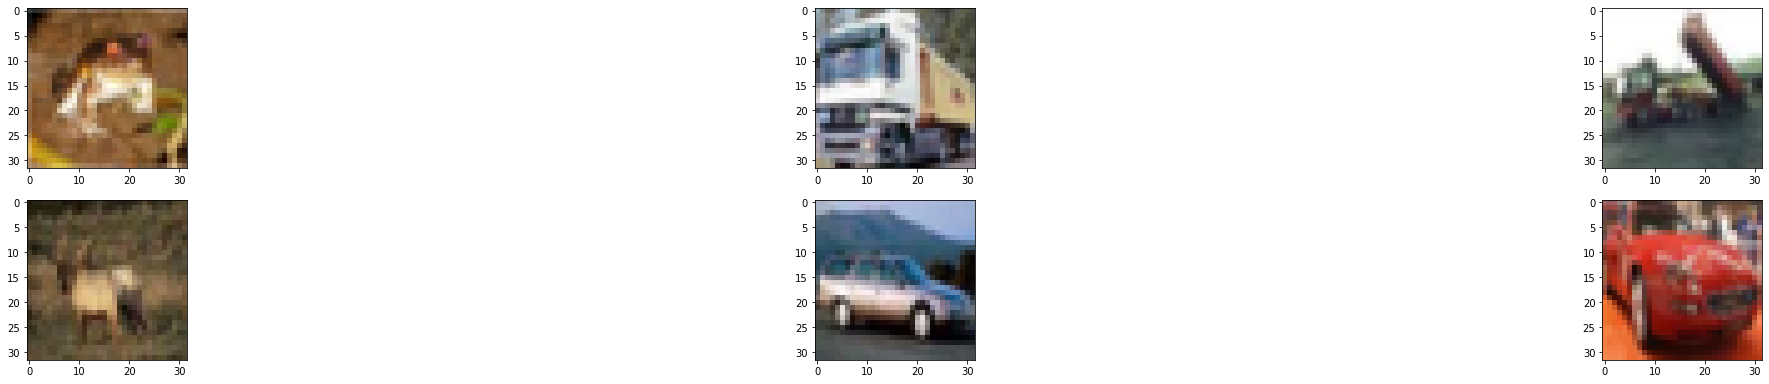

In [ ]:
#Plot some images from the dataset to visualize the dataset and display from TrainX set
n=6
plt.figure(figsize=(40,10))
for i in range(n):
  plt.subplot(330+1+i)
  plt.imshow(train_X[i])
plt.show()

In [ ]:
#Import the required layers and modules to create our convolution neural net architecture
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [ ]:
# Normalize the data. Before we need to connvert data type to float for computation.
train_x=train_X.astype('float32')
test_X=test_X.astype('float32')
# Convert class vectors to binary class matrices. This is called one hot encoding.
train_X=train_X/255.0
test_X=test_X/255.0

In [ ]:
#Perform the one-hot encoding for target classes
train_Y=np_utils.to_categorical(train_Y)
test_Y=np_utils.to_categorical(test_Y)
num_classes=test_Y.shape[1]

In [ ]:
#Create the sequential model and add the layers
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3),
    padding='same',activation='relu',
    kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
#Configure the optimizer
sgd=SGD(lr=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)
#Compiling the model with parameter 
model.compile(loss='categorical_crossentropy',
  optimizer=sgd,
  metrics=['accuracy'])

In [ ]:
#View the model summary for better understanding of model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)              

In [ ]:
#Iteration and Train the model
model.fit(train_X,train_Y,
    validation_data=(test_X,test_Y),
    epochs=50,batch_size=32)

Epoch 1/50
1563/1563 [==============================] - 223s 143ms/step - loss: 0.1083 - accuracy: 0.9643 - val_loss: 1.2586 - val_accuracy: 0.7084
Epoch 2/50
1563/1563 [==============================] - 220s 141ms/step - loss: 0.1093 - accuracy: 0.9642 - val_loss: 1.2476 - val_accuracy: 0.7099
Epoch 3/50
1563/1563 [==============================] - 220s 141ms/step - loss: 0.1079 - accuracy: 0.9641 - val_loss: 1.2569 - val_accuracy: 0.7082
Epoch 4/50
1563/1563 [==============================] - 221s 141ms/step - loss: 0.1064 - accuracy: 0.9651 - val_loss: 1.2431 - val_accuracy: 0.7082
Epoch 5/50
1563/1563 [==============================] - 221s 142ms/step - loss: 0.1032 - accuracy: 0.9660 - val_loss: 1.2566 - val_accuracy: 0.7095
Epoch 6/50
1563/1563 [==============================] - 221s 141ms/step - loss: 0.1013 - accuracy: 0.9669 - val_loss: 1.2650 - val_accuracy: 0.7111
Epoch 7/50
1563/1563 [==============================] - 220s 141ms/step - loss: 0.0990 - accuracy: 0.9679 - val_

In [ ]:
#Calculate its accuracy on testing data
_,acc=model.evaluate(test_X,test_Y)
print(acc*100)

313/313 [==============================] - 9s 29ms/step - loss: 1.3801 - accuracy: 0.7122
71.21999859809875


In [ ]:
#Saving the Model
model.save("IVPModel.h5")

In [ ]:
#Make a dictionary to map to the output Categorical classes and make predictions from the model
results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}
print(results)

{0: 'aeroplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


(6000, 4000)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


1 automobile


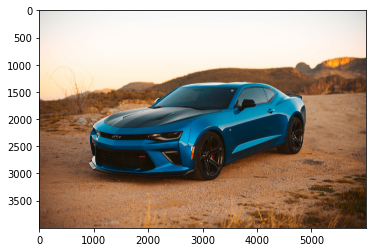

In [ ]:
#Image Classification 
from PIL import Image
import numpy as np
im=Image.open("/content/stefan-rodriguez-2AovfzYV3rc-unsplash.jpg")
# the input image is required to be in the shape of dataset, i.e (32,32,3)
print(im.size)
plt.imshow(im)
im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=model.predict_classes([im])[0]
print(pred,results[pred])

(4000, 6000)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


4 deer


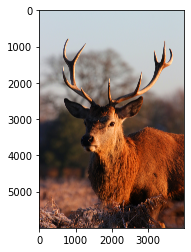

In [ ]:
im=Image.open("/content/john-cox-PabQD2l3gRw-unsplash.jpg")
# the input image is required to be in the shape of dataset, i.e (32,32,3)
print(im.size)
plt.imshow(im)
im=im.resize((32,32))
im=np.expand_dims(im,axis=0)
im=np.array(im)
pred=model.predict_classes([im])[0]
print(pred,results[pred])

(5184, 3456)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


5 dog


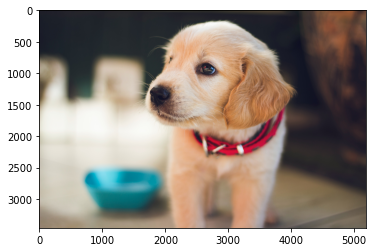

In [ ]:
img=Image.open("/content/berkay-gumustekin-ngqyo2AYYnE-unsplash.jpg")
# the input image is required to be in the shape of dataset, i.e (32,32,3)
print(img.size)
plt.imshow(img)
img=img.resize((32,32))
img=np.expand_dims(img,axis=0)
img=np.array(img)
pred=model.predict_classes([img])[0]
print(pred,results[pred])

# Image Labelling and Prediction

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import seaborn as sns
import matplotlib
from sklearn.metrics import confusion_matrix, classification_report
import itertools

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [ ]:
batch_size = 32  # The default batch size of keras.
num_classes = 10  # Number of class for the dataset
epochs = 50
data_augmentation = False

In [ ]:
# Normalize the data. Before we need to connvert data type to float for computation.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/50
1563/1563 [==============================] - 250s 159ms/step - loss: 2.2184 - accuracy: 0.1824 - val_loss: 2.0153 - val_accuracy: 0.2820
Epoch 2/50
1563/1563 [==============================] - 257s 164ms/step - loss: 1.9883 - accuracy: 0.2911 - val_loss: 1.9032 - val_accuracy: 0.3247
Epoch 3/50
1563/1563 [==============================] - 258s 165ms/step - loss: 1.8680 - accuracy: 0.3363 - val_loss: 1.7748 - val_accuracy: 0.3793
Epoch 4/50
1563/1563 [==============================] - 264s 169ms/step - loss: 1.7935 - accuracy: 0.3641 - val_loss: 1.7220 - val_accuracy: 0.3963
Epoch 5/50
1563/1563 [==============================] - 260s 166ms/step - loss: 1.7288 - accuracy: 0.3867 - val_loss: 1.6856 - val_accuracy: 0.4074
Epoch 6/50
1563/1563 [==============================] - 260s 166ms/step - loss: 1.6829 - accuracy: 0.4063 - val_loss: 1.6236 - val_accuracy: 0.4337
Epoch 7/50
1563/1563 [==============================] - 262s 167ms/step - loss: 1.6414 - accuracy: 0.4196 - val_

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


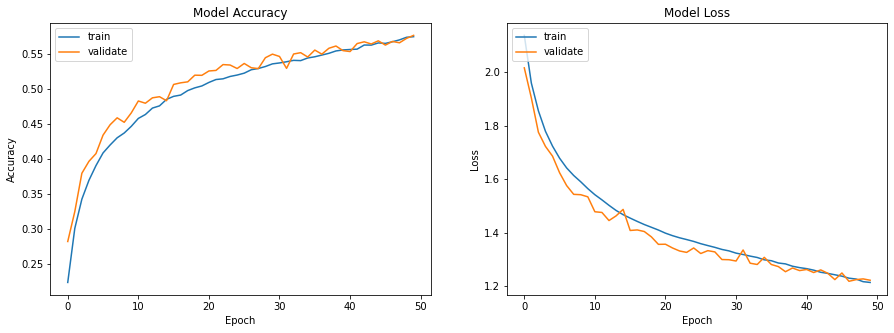

In [ ]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

# list all data in history
print(history.history.keys())

plotmodelhistory(history)

In [ ]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# make prediction.
pred = model.predict(x_test)

313/313 [==============================] - 9s 30ms/step - loss: 1.2221 - accuracy: 0.5760
Test loss: 1.222062110900879
Test accuracy: 0.5759999752044678


In [ ]:
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(pred, axis=1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis=1)
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)
#Defining Error Variables and Predicted Errors
Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = x_test[errors]
#Creating the Confusion Matrix
cm = confusion_matrix(Y_true, Y_pred_classes) 
thresh = cm.max() / 2.

This will allow us to evaluate the model with other metrics (Precision, Recall, F1 score)

In [ ]:
print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.62      0.69      0.65      1000
           1       0.74      0.63      0.68      1000
           2       0.47      0.41      0.44      1000
           3       0.45      0.31      0.37      1000
           4       0.42      0.62      0.50      1000
           5       0.52      0.45      0.48      1000
           6       0.59      0.66      0.62      1000
           7       0.61      0.67      0.64      1000
           8       0.73      0.68      0.70      1000
           9       0.66      0.64      0.65      1000

    accuracy                           0.58     10000
   macro avg       0.58      0.58      0.57     10000
weighted avg       0.58      0.58      0.57     10000



In [ ]:
#Check the predictions of the dataset
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
R = 5
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,12))
axes = axes.ravel()
#Predicting Labels and Image classification
for i in np.arange(0, R*C):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (labels[Y_true[i]], labels[Y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

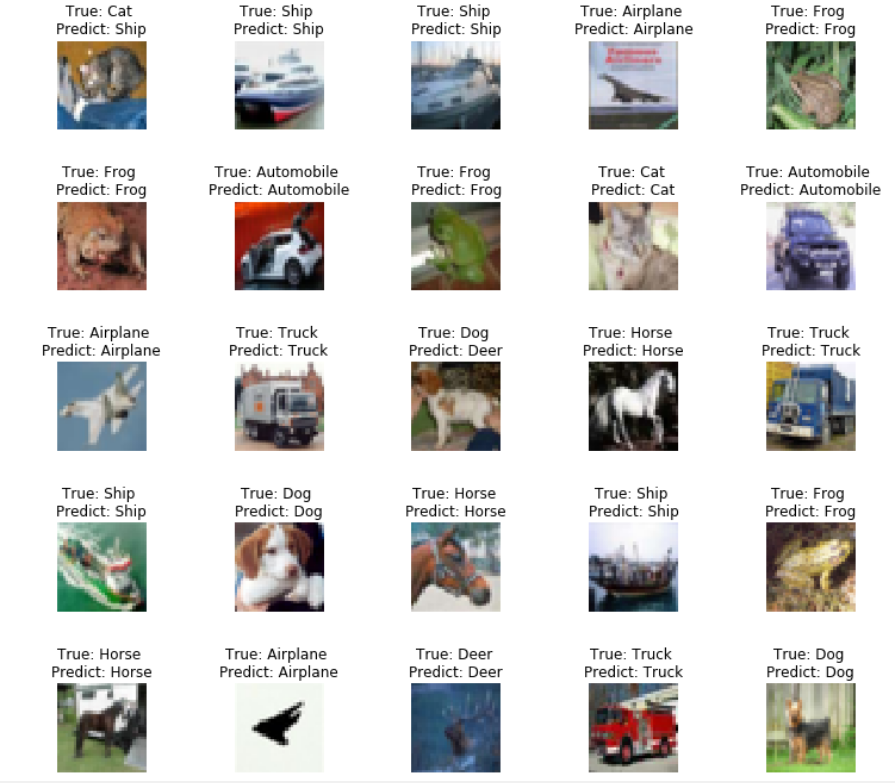

In [ ]:
#Creating code to Find the wrong predictions made by the model
R = 3
C = 5
fig, axes = plt.subplots(R, C, figsize=(12,8))
axes = axes.ravel()
#Matching the True and Predicted Label to find Wether wrong prediction and Display
misclassified_idx = np.where(Y_pred_classes != Y_true)[0]
for i in np.arange(0, R*C):
    axes[i].imshow(x_test[misclassified_idx[i]])
    axes[i].set_title("True: %s \nPredicted: %s" % (labels[Y_true[misclassified_idx[i]]], 
                                                  labels[Y_pred_classes[misclassified_idx[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

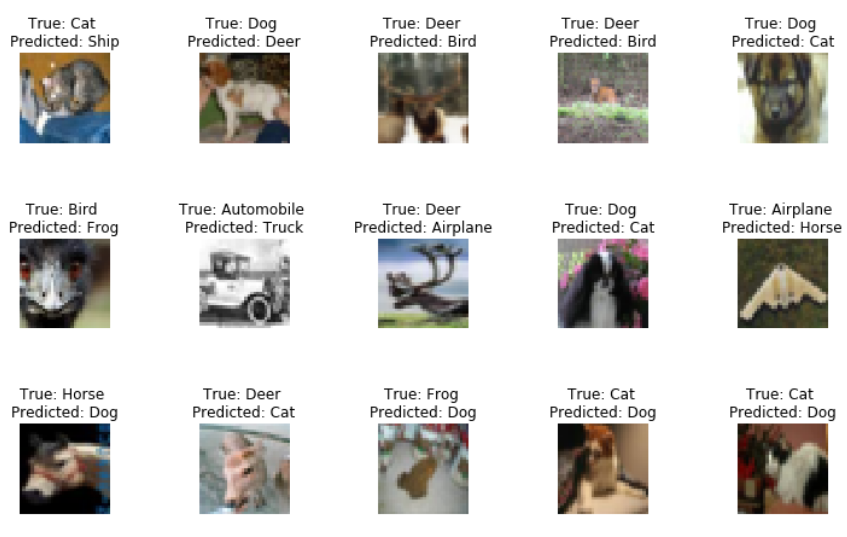